# Importando as bibliotecas e carregando o dataset

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize

import spacy

import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''Neste caso, já recebemos o Dataset divido em conjuntos de treino, teste e validação, assim, 
não será necessário realizar a divisão aqui.'''

df_train = pd.read_csv('video_games_reviews_train.csv')
df_test = pd.read_csv('video_games_reviews_test.csv')
df_dev = pd.read_csv('video_games_reviews_dev.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         8000 non-null   int64 
 1   index           8000 non-null   int64 
 2   reviewerID      8000 non-null   object
 3   asin            8000 non-null   object
 4   reviewerName    7916 non-null   object
 5   helpful         8000 non-null   object
 6   reviewText      7999 non-null   object
 7   overall         8000 non-null   int64 
 8   summary         8000 non-null   object
 9   unixReviewTime  8000 non-null   int64 
 10  reviewTime      8000 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


In [5]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


# Pré-Processamento

In [6]:
df_train['clean_text'] = df_train['reviewText'].str.lower()
# Normalização

In [7]:
df_train['clean_text'] = df_train['clean_text'].str.translate(str.maketrans('', '', string.punctuation))
# Normalização

In [8]:
df_train.dropna(inplace=True)
df_train['clean_text'] = df_train['clean_text'].apply(word_tokenize)

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words = set(map(lambda s: s.replace("'", ""), stop_words))

In [10]:
df_train['clean_text'] = df_train['clean_text'].apply(lambda a: [x for x in a if x not in stop_words])

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
df_train['clean_text'] = df_train['clean_text'].apply(lambda a: [lemmatizer.lemmatize(x, pos = "v") for x in a])

In [12]:
df_train['clean_text'] = df_train['clean_text'].apply(lambda a: " ".join(a))

In [13]:
def pre_processing(df):
    df['clean_text'] = df['reviewText'].str.lower()
    df['clean_text'] = df['clean_text'].str.translate(str.maketrans('', '', string.punctuation))
    df.dropna(inplace=True)
    df['clean_text'] = df['clean_text'].apply(word_tokenize)
    df['clean_text'] = df['clean_text'].apply(lambda a: [x for x in a if x not in stop_words])
    df['clean_text'] = df['clean_text'].apply(lambda a: [lemmatizer.lemmatize(x, pos = "v") for x in a])
    df['clean_text'] = df['clean_text'].apply(lambda a: " ".join(a))
    return df

In [14]:
df_test = pre_processing(df_test)
df_dev = pre_processing(df_dev)

# Análise do Corpus

## Antes de realizar a análise do corpus, vamos adicionar uma nova coluna, indicando se a review é positiva ou negativa, a depender de sua nota

In [15]:
df_train['sentiment'] = df_train['overall'].apply(lambda x: 1 if x >= 3 else 0)
df_test['sentiment'] = df_test['overall'].apply(lambda x: 1 if x >= 3 else 0)
df_dev['sentiment'] = df_dev['overall'].apply(lambda x: 1 if x >= 3 else 0)

In [16]:
# Aqui criamos um DataFrame que compila todos os dataframes trabalhados até aqui, para facilitar a análise do corpus.
df_full = pd.concat([df_dev,df_test,df_train])

## Primeiro, vamos realizar uma análise do tamanho das reviews e das categorias.

[[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]]

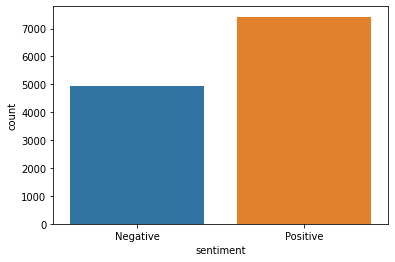

In [17]:
g = sns.countplot(x="sentiment", data=df_full)
g.set(xticklabels=["Negative", "Positive"])

In [18]:
df_full['size'] = df_full['reviewText'].apply(len)

In [19]:
df_full['size'].describe()

count    12355.000000
mean      1221.788345
std       1659.868674
min          9.000000
25%        289.000000
50%        669.000000
75%       1487.000000
max      32689.000000
Name: size, dtype: float64

<AxesSubplot:ylabel='size'>

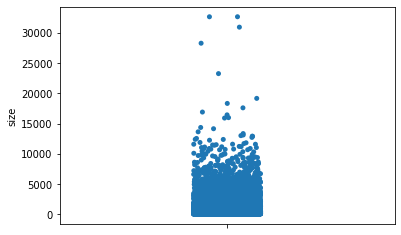

In [20]:
sns.stripplot(y = df_full['size'])

<AxesSubplot:ylabel='size'>

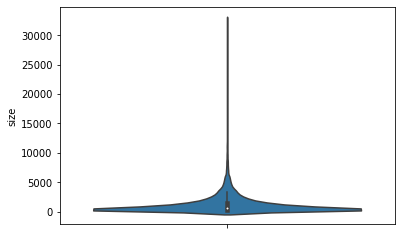

In [21]:
sns.violinplot(y = df_full['size'])

[[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]]

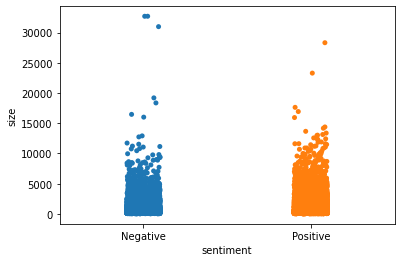

In [22]:
ax = sns.stripplot(x=df_full['sentiment'], y = df_full['size'])
ax.set(xticklabels=["Negative", "Positive"])

[[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]]

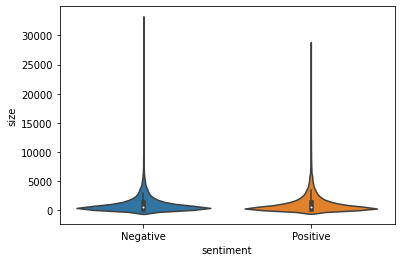

In [23]:
ax = sns.violinplot(x=df_full['sentiment'], y = df_full['size'])
ax.set(xticklabels=["Negative", "Positive"])

### Conclusões: Primeiro, é possível perceber que existe um pequeno desbalanceamento nas classes do DataSet, mas não chega a ser algo que deve afetar a perfomance e os resultados dos modelos.
### No que tange a distribuição dos tamanhos das análises, percebe-se que há uma forte concentração de tamanho em torno da casa dos 1000 caracteres, apesar de existirem outliers. Além diso, é válido destacar que tanto análises negativas quanto positivas tem distribuições semelhantes, com as análises negatives apresentando outliers mais expressivos. A presença de outliers em ambas provavelmente se deve ao fato de que se escreve reviews muito longas apenas quando se possui sentimentos muito fortes(tanto negativos, quanto positivos) sobre o assunto em questão. 

## Frequência de Termos

In [24]:
from nltk.util import ngrams

In [25]:
df_full['bigrams'] = df_full['clean_text'].apply(lambda a: a.split()).apply(lambda a: ngrams(a,2)).apply(lambda a: [x for x in a])

In [26]:
df_full['trigrams'] = df_full['clean_text'].apply(lambda a: a.split()).apply(lambda a: ngrams(a,3)).apply(lambda a: [x for x in a])

In [27]:
list_bigrams = []
for i in df_full['bigrams']:
    for j in i:
        list_bigrams.append(j)

In [28]:
bigrams_series = (pd.Series(list_bigrams).value_counts())

<AxesSubplot:>

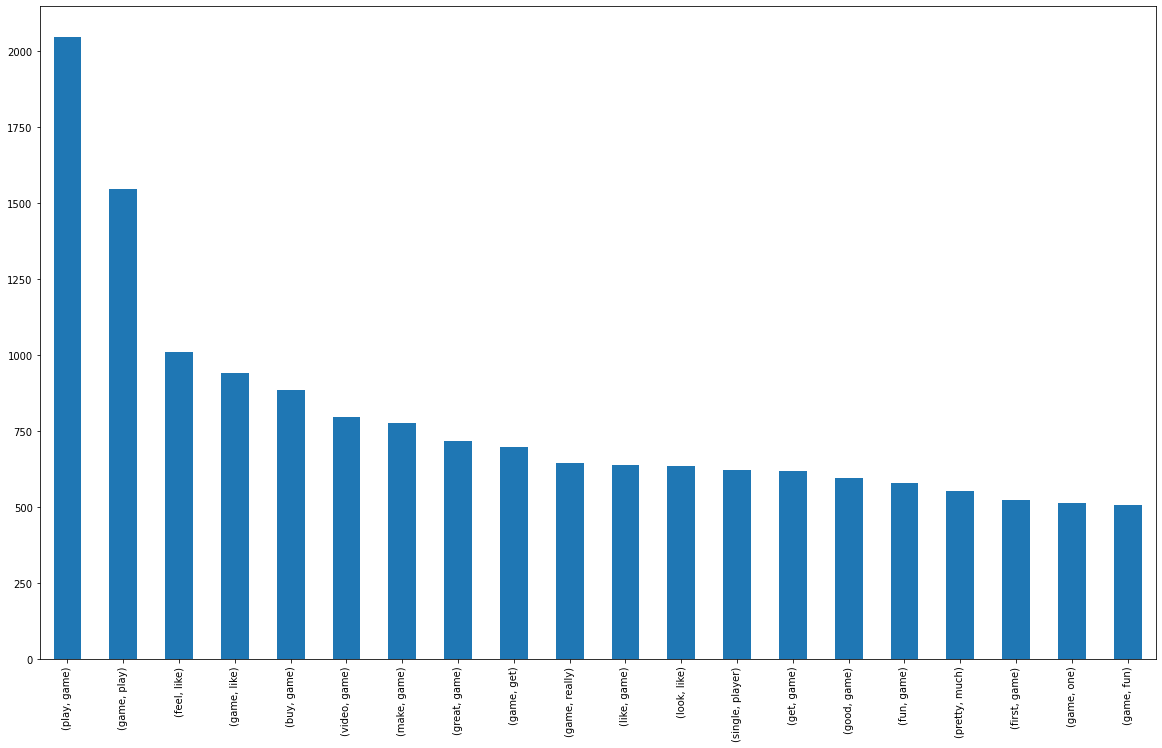

In [29]:
bigrams_series[:20].plot(kind = 'bar', figsize=(20,12))

In [30]:
list_trigrams = []
for i in df_full['trigrams']:
    for j in i:
        list_trigrams.append(j)

In [31]:
trigrams_series = (pd.Series(list_trigrams).value_counts())

<AxesSubplot:>

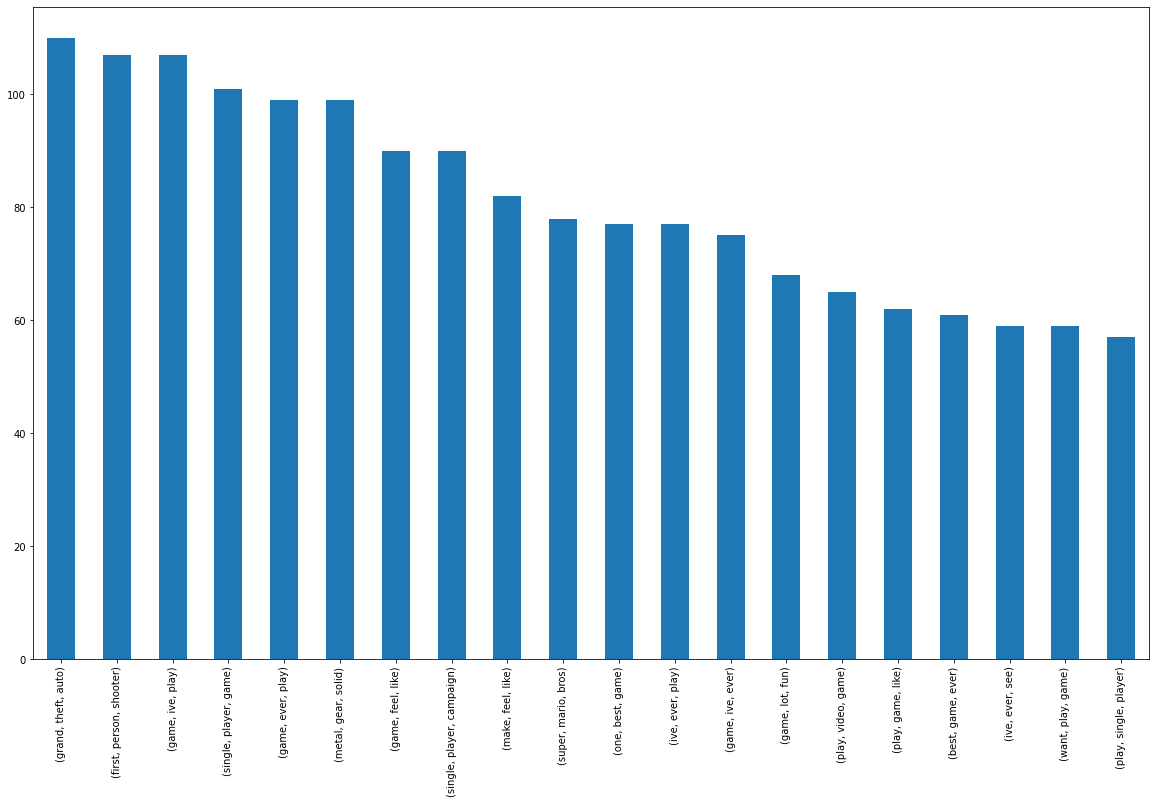

In [32]:
trigrams_series[:20].plot(kind = 'bar', figsize=(20,12))

In [33]:
list_bigrams_neg = []
for i in df_full[df_full['sentiment']==0]['bigrams']:
    for j in i:
        list_bigrams_neg.append(j)

<AxesSubplot:>

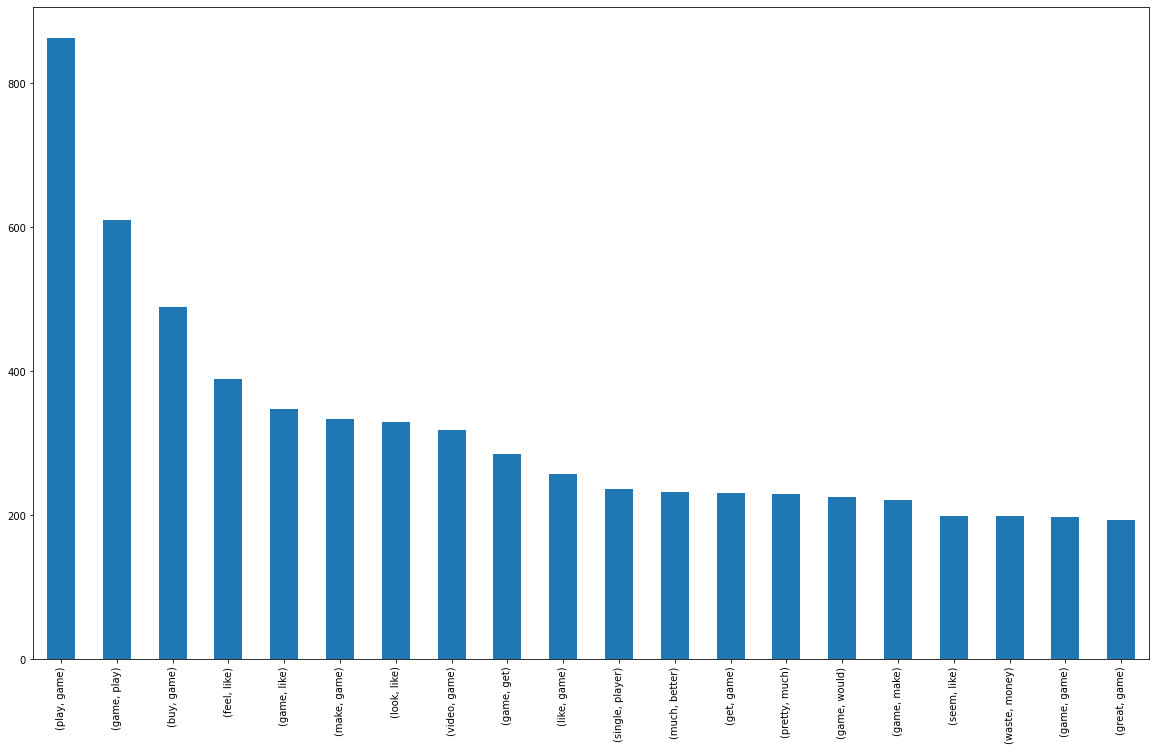

In [34]:
bigrams_series_neg = (pd.Series(list_bigrams_neg).value_counts())
bigrams_series_neg[:20].plot(kind = 'bar', figsize=(20,12))

In [35]:
list_bigrams_pos = []
for i in df_full[df_full['sentiment']==1]['bigrams']:
    for j in i:
        list_bigrams_pos.append(j)

<AxesSubplot:>

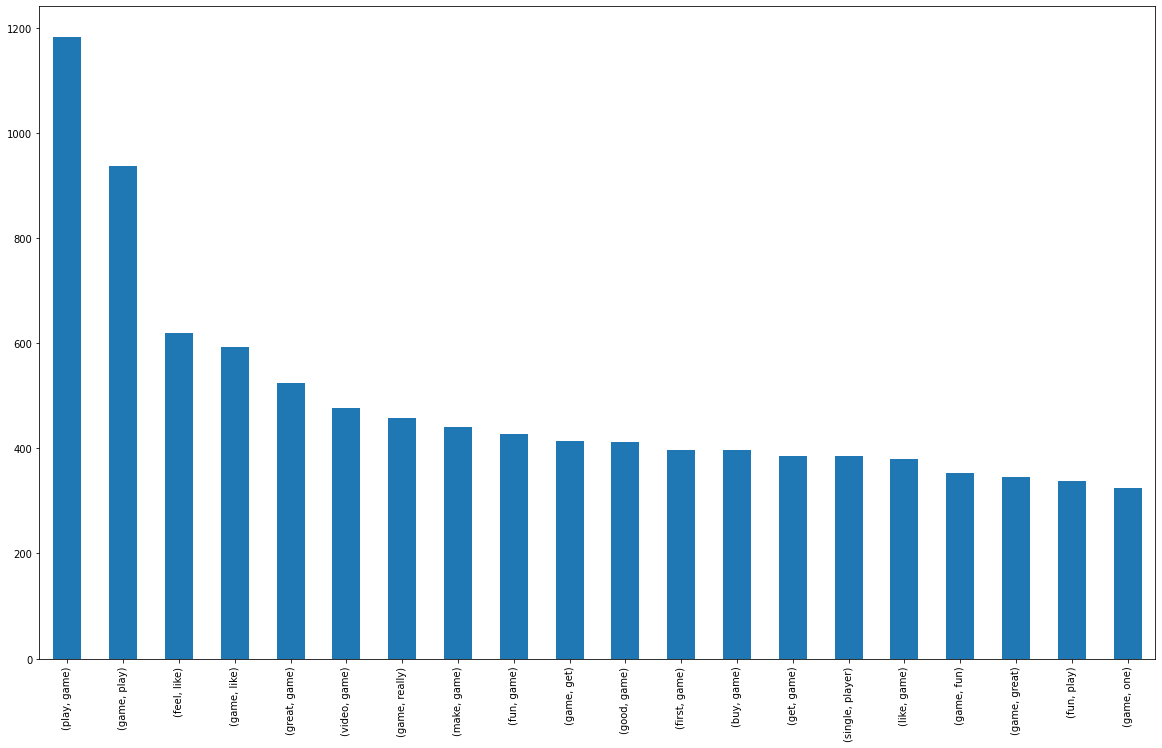

In [36]:
bigrams_series_pos = (pd.Series(list_bigrams_pos).value_counts())
bigrams_series_pos[:20].plot(kind = 'bar', figsize=(20,12))

In [37]:
list_trigrams_pos = []
for i in df_full[df_full['sentiment']==1]['trigrams']:
    for j in i:
        list_trigrams_pos.append(j)

<AxesSubplot:>

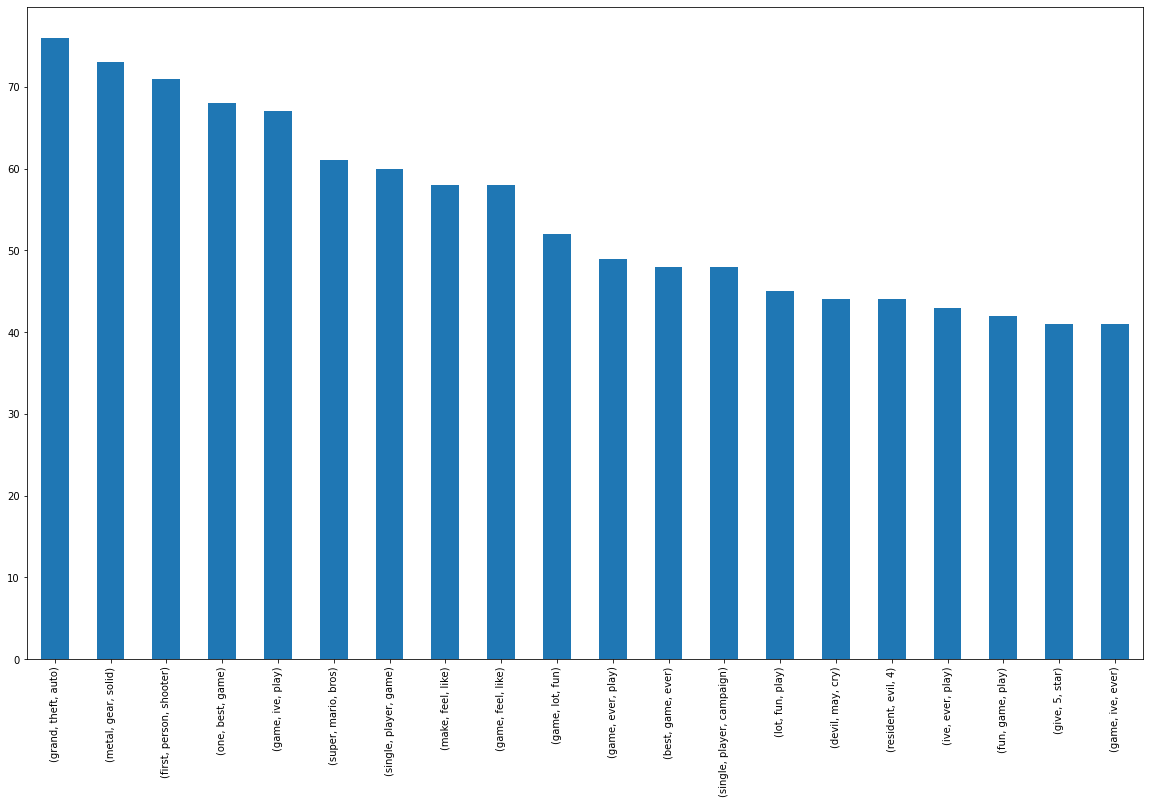

In [38]:
trigrams_series_pos = (pd.Series(list_trigrams_pos).value_counts())
trigrams_series_pos[:20].plot(kind = 'bar', figsize=(20,12))

In [39]:
list_trigrams_neg = []
for i in df_full[df_full['sentiment']==0]['trigrams']:
    for j in i:
        list_trigrams_neg.append(j)

<AxesSubplot:>

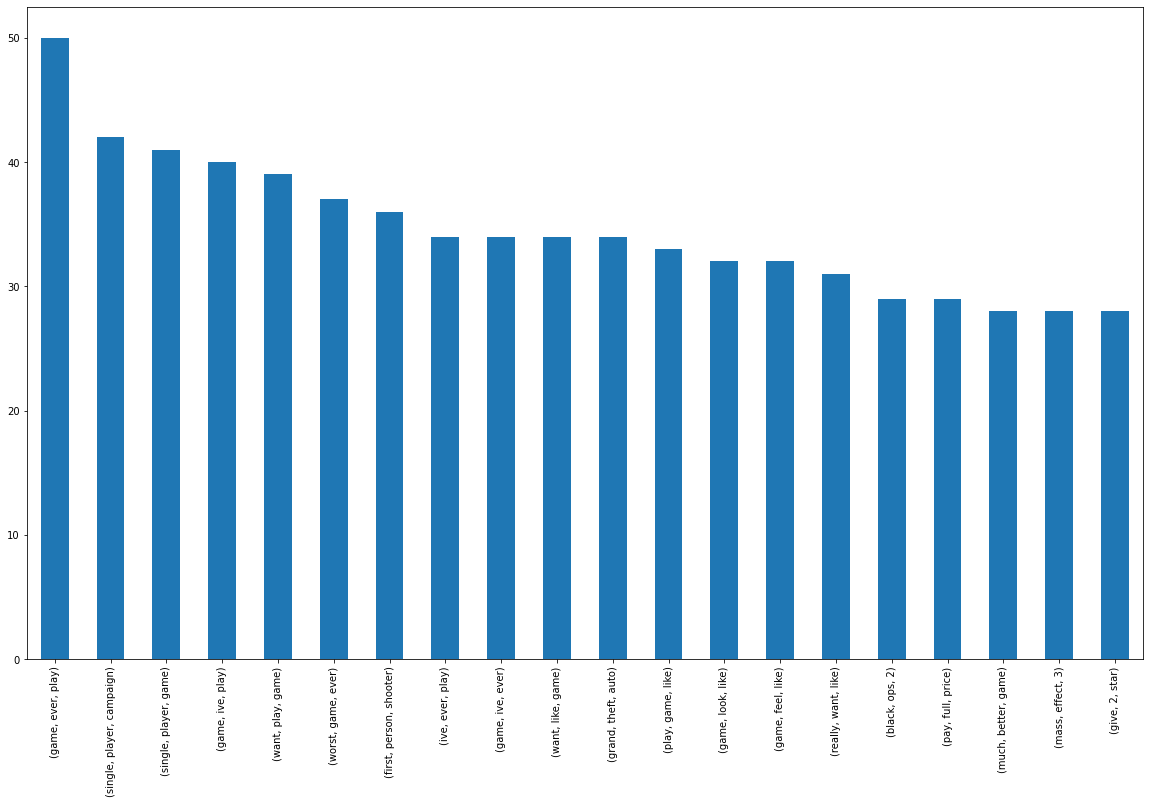

In [40]:
trigrams_series_neg = (pd.Series(list_trigrams_neg).value_counts())
trigrams_series_neg[:20].plot(kind = 'bar', figsize=(20,12))

### Na análise da frequência, já é possível perceber quais features potencialmente serão úteis para a criação de nosso modelo. Nas análises positivas, bigramas e trigramas que remetem a sentimentos positivos aparecem com maior frequência, o que não ocorre nas análises negativas.

In [41]:
frequency = nltk.FreqDist([j for i in df_full['clean_text'] for j in i.split()])

In [42]:
frequency.most_common()[:20]

[('game', 55553),
 ('play', 16398),
 ('get', 15455),
 ('like', 13562),
 ('one', 10299),
 ('time', 9088),
 ('make', 9037),
 ('go', 7549),
 ('really', 7058),
 ('good', 6826),
 ('use', 6457),
 ('even', 6156),
 ('would', 6006),
 ('fun', 5989),
 ('much', 5909),
 ('first', 5376),
 ('character', 5298),
 ('great', 5276),
 ('buy', 5156),
 ('look', 5098)]

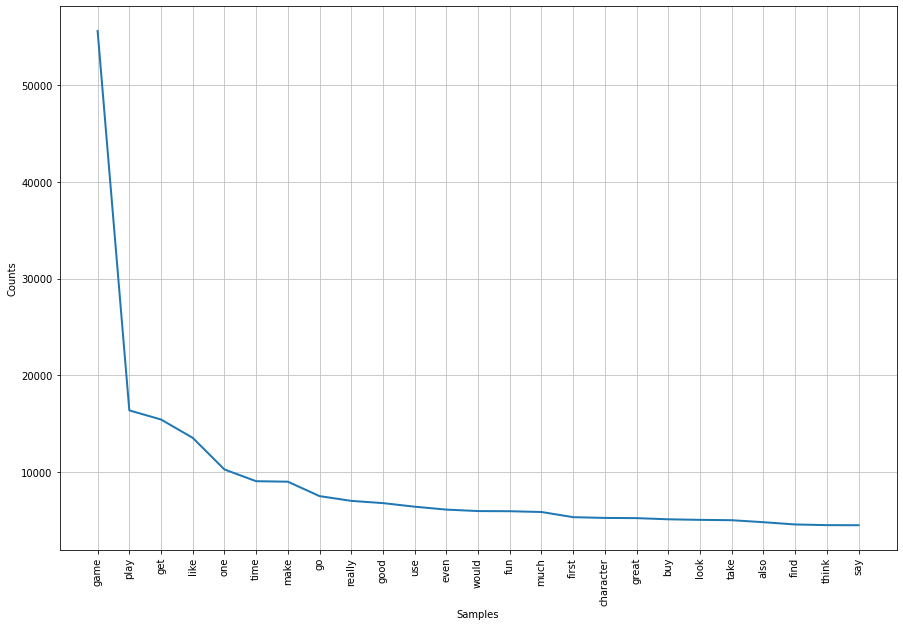

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
plt.figure(figsize=(15,10))
frequency.plot(25)

In [44]:
df_train['clean_text'] = df_train['clean_text'].str.split(' ').apply(lambda a: [x for x in a if x not in ['game','play','get','like','one']]).apply(lambda a: " ".join(a))
df_test['clean_text'] = df_test['clean_text'].str.split(' ').apply(lambda a: [x for x in a if x not in ['game','play','get','like','one']]).apply(lambda a: " ".join(a))
df_dev['clean_text'] = df_dev['clean_text'].str.split(' ').apply(lambda a: [x for x in a if x not in ['game','play','get','like','one']]).apply(lambda a: " ".join(a))


In [45]:
df_full = pd.concat([df_dev,df_test,df_train])

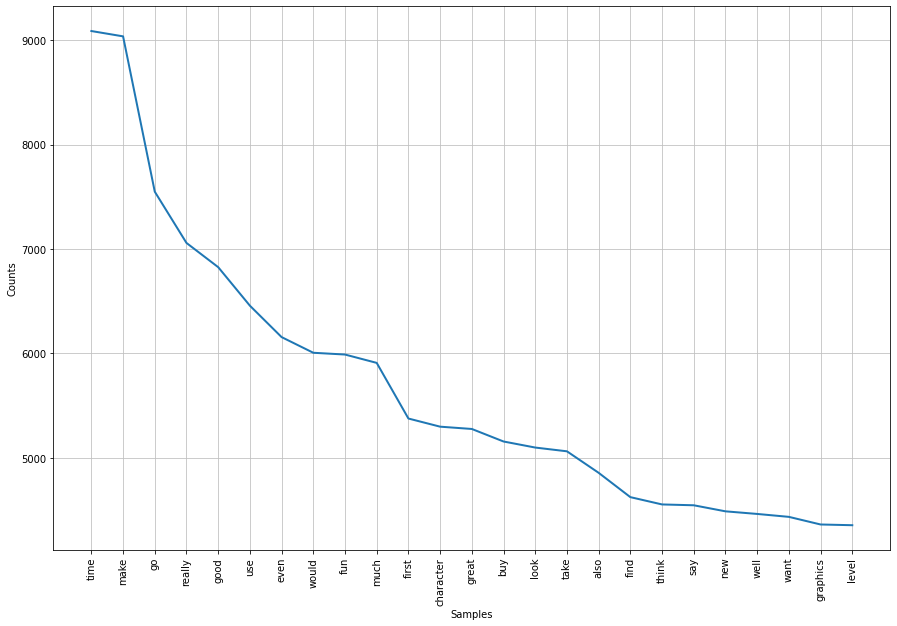

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
frequency = nltk.FreqDist([j for i in df_full['clean_text'] for j in i.split()])
plt.figure(figsize=(15,10))
frequency.plot(25)

### Por meio da análise de frequência de palavras, é possível perceber que algumas palavras aparecem com uma grande frequência neste DataSet, não importando o tipo de review, portanto, provavelmente não serão úteis no momento de Feature Engineering e, por isso, realizamos a remoção destas palavras

## Classes Gramaticais

In [47]:
df_full['WordClasses'] = df_full['reviewText'].str.split().apply(lambda a: nltk.pos_tag(a)).apply(lambda x: list(map(lambda y: y[1], x)))

In [48]:
import itertools
positive_classes = list(df_full[df_full['sentiment']==1]['WordClasses'])
positive_classes = list(itertools.chain(*positive_classes))
negative_classes = list(df_full[df_full['sentiment']==1]['WordClasses'])
negative_classes = list(itertools.chain(*positive_classes))

In [49]:
from collections import Counter
positive_count = Counter(positive_classes)
negative_count = Counter(negative_classes)

<AxesSubplot:>

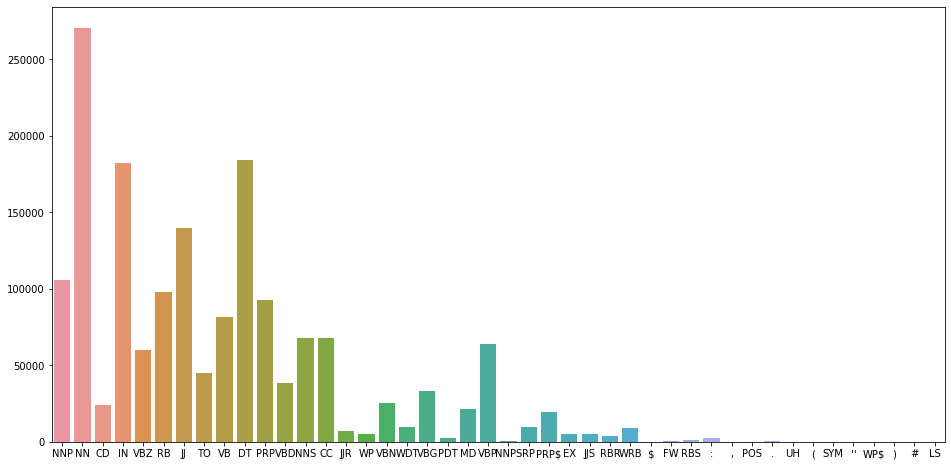

In [50]:
plt.figure(figsize = (16,8)) 
sns.barplot(x=list(positive_count.keys()), y = list(positive_count.values()))

<AxesSubplot:>

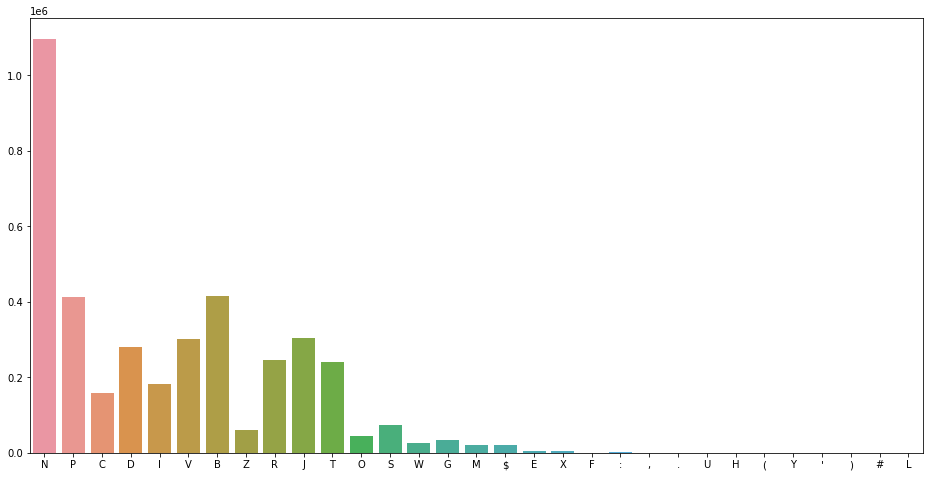

In [51]:
plt.figure(figsize = (16,8)) 
sns.barplot(x=list(negative_count.keys()), y = list(negative_count.values()))

### As classes gramaticias são distribuídas de maneira semelhante entre os tipos de Review, portanto, não serão utilizadas como features no momento de construção de nosso modelo}

## Entidades

In [52]:
nlp = spacy.load("en_core_web_sm")

In [53]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [54]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [55]:
teste = lambda a: [x.label_ for x in nlp(a).ents]

In [56]:
teste("Apple is looking at buying U.K. startup for $1 billion")

['ORG', 'GPE', 'MONEY']

In [57]:
positive_ents = list(itertools.chain(*list(df_full[df_full['sentiment']==1]['reviewText'].apply(lambda a: [x.label_ for x in nlp(a).ents]))))

In [58]:
negative_ents = list(itertools.chain(*list(df_full[df_full['sentiment']==0]['reviewText'].apply(lambda a: [x.label_ for x in nlp(a).ents]))))

In [59]:
positive_count_ent = Counter(positive_ents)
negative_count_ent = Counter(negative_ents)

<AxesSubplot:>

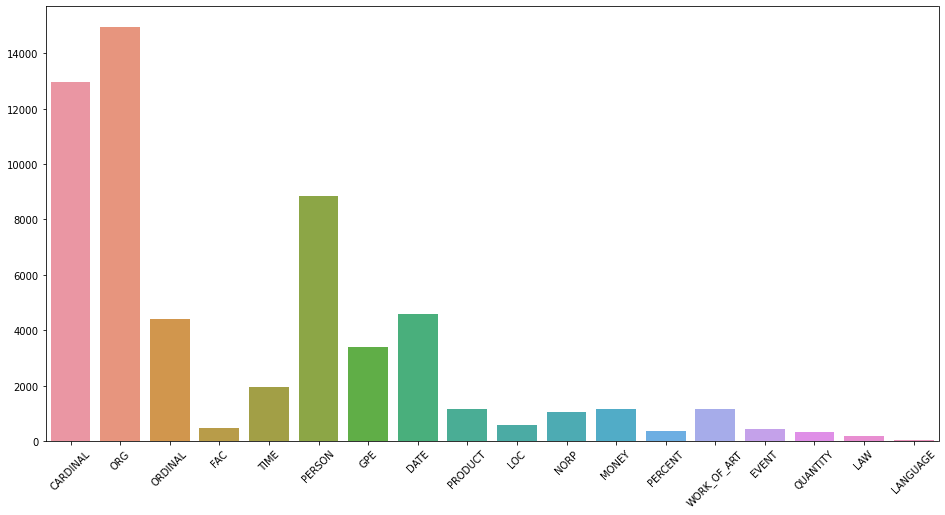

In [60]:
plt.figure(figsize = (16,8))
plt.xticks(rotation = 45)
sns.barplot(x=list(positive_count_ent.keys()), y = list(positive_count_ent.values()))

<AxesSubplot:>

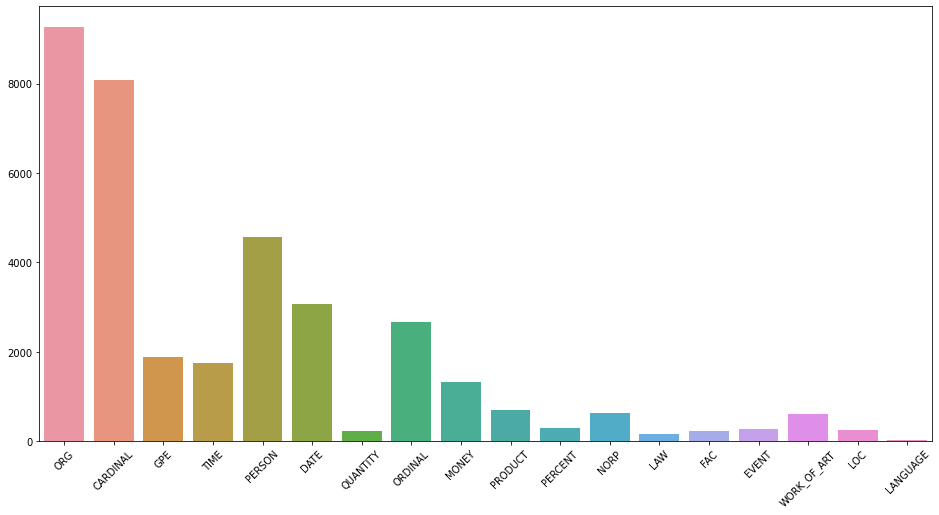

In [61]:
plt.figure(figsize = (16,8))
plt.xticks(rotation = 45)
sns.barplot(x=list(negative_count_ent.keys()), y = list(negative_count_ent.values()))

### Assim como nas classes gramaticais, não há diferenças significativas entre as entidades extraídas de reviews positivas ou negativas.

## Frequência de Letras Maiúsculas

In [62]:
df_full['CountUpper'] = df_full['reviewText'].apply(lambda b: len(list(filter(lambda y: y.isupper(), b))))

In [63]:
df_full['CountTotal'] = df_full['reviewText'].apply(lambda a: ''.join(filter(str.isalpha, a))).str.len()

In [64]:
df_full[df_full['sentiment']==1]['CountTotal'].sum()

7280269

In [65]:
(df_full[df_full['sentiment']==0]['CountUpper'].sum()/df_full[df_full['sentiment']==0]['CountTotal'].sum())*100

4.194141934866901

<AxesSubplot:>

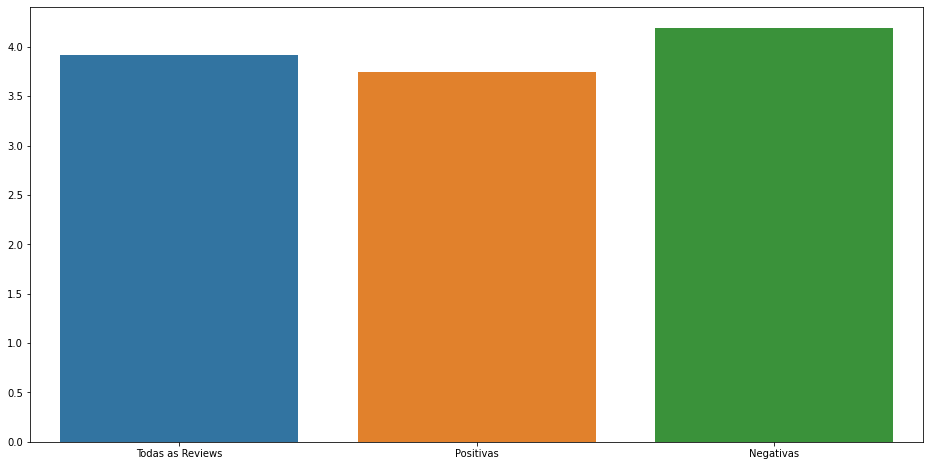

In [66]:
plt.figure(figsize = (16,8))
sns.barplot(x=list(['Todas as Reviews', 'Positivas','Negativas']), y = [(df_full['CountUpper'].sum()/df_full['CountTotal'].sum())*100,(df_full[df_full['sentiment']==1]['CountUpper'].sum()/df_full[df_full['sentiment']==1]['CountTotal'].sum())*100,(df_full[df_full['sentiment']==0]['CountUpper'].sum()/df_full[df_full['sentiment']==0]['CountTotal'].sum())*100])

### Aqui também não há grandes diferenças entre a frequência de letras maiúsculas quando comparamos reviews positivas e negativas.

# Modelagem e Feature Engineering

## Aqui, iremos criar dois tipos de features: TF-IDF(Contagem relativa) e Bag of Words(Vetorização, contagem absoluta)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
BOWvectorizer = CountVectorizer(max_features = 4000)

In [69]:
train_bow = pd.DataFrame(BOWvectorizer.fit_transform(df_train['clean_text']).toarray(), columns = BOWvectorizer.get_feature_names())
test_bow = pd.DataFrame(BOWvectorizer.fit_transform(df_test['clean_text']).toarray(), columns = BOWvectorizer.get_feature_names())
dev_bow = pd.DataFrame(BOWvectorizer.fit_transform(df_dev['clean_text']).toarray(), columns = BOWvectorizer.get_feature_names())

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
TFIDFVectorizer = TfidfVectorizer(max_features = 3000)

In [72]:
train_tf = pd.DataFrame(TFIDFVectorizer.fit_transform(df_train['clean_text']).toarray(), columns = TFIDFVectorizer.get_feature_names())
test_tf = pd.DataFrame(TFIDFVectorizer.fit_transform(df_test['clean_text']).toarray(), columns = TFIDFVectorizer.get_feature_names())
dev_tf = pd.DataFrame(TFIDFVectorizer.fit_transform(df_dev['clean_text']).toarray(), columns = TFIDFVectorizer.get_feature_names())

## Em se tratando da modelagem, vamos testar dois modelos relativamente simples: Regressão Logística e um do tipo Naive Bayes

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [76]:
model = LogisticRegression(C=1)
model.fit(train_bow, df_train['sentiment'])
y_pred = model.predict(test_bow)

Acurácia: 0.5591093117408907
F1 Score: 0.6423645320197044
Recall Score: 0.6735537190082644


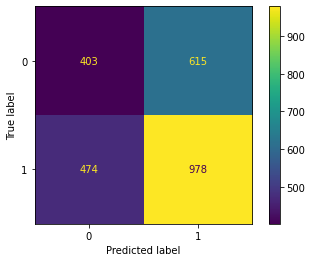

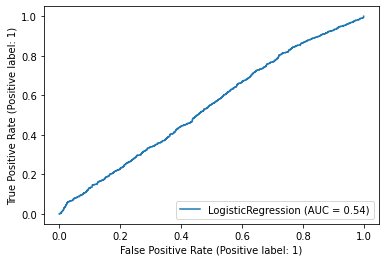

In [77]:
print('Acurácia: '+ str(accuracy_score(df_test['sentiment'], y_pred)))
print('F1 Score: ' + str(f1_score(df_test['sentiment'], y_pred)))
print('Recall Score: '+str(recall_score(df_test['sentiment'], y_pred)))
ConfusionMatrixDisplay.from_estimator(model, test_bow, df_test['sentiment'])
RocCurveDisplay.from_estimator(model, test_bow, df_test['sentiment'])

In [78]:
model = LogisticRegression(C=1)
model.fit(train_tf, df_train['sentiment'])
y_pred = model.predict(test_tf)

Acurácia: 0.5651821862348179
F1 Score: 0.6735562310030395
Recall Score: 0.7630853994490359


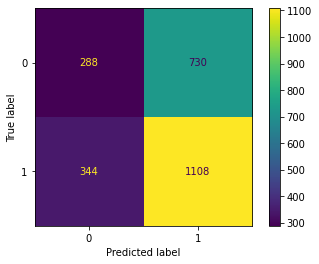

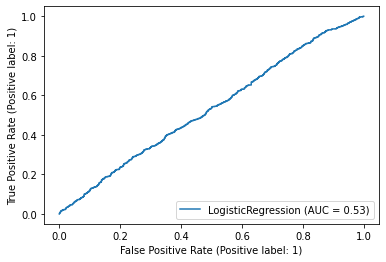

In [79]:
print('Acurácia: '+ str(accuracy_score(df_test['sentiment'], y_pred)))
print('F1 Score: ' + str(f1_score(df_test['sentiment'], y_pred)))
print('Recall Score: '+str(recall_score(df_test['sentiment'], y_pred)))
ConfusionMatrixDisplay.from_estimator(model, test_tf, df_test['sentiment'])
RocCurveDisplay.from_estimator(model, test_tf, df_test['sentiment'])

In [80]:
model = GaussianNB()
model.fit(train_tf, df_train['sentiment'])
y_pred = model.predict(test_tf)

Acurácia: 0.5530364372469636
F1 Score: 0.6603076923076923
Recall Score: 0.7389807162534435


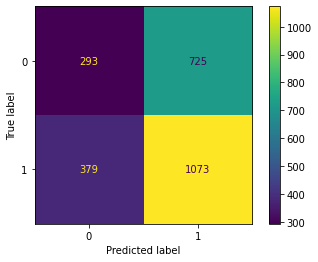

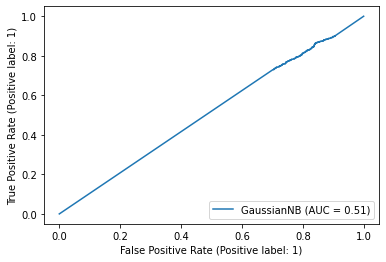

In [81]:
print('Acurácia: '+ str(accuracy_score(df_test['sentiment'], y_pred)))
print('F1 Score: ' + str(f1_score(df_test['sentiment'], y_pred)))
print('Recall Score: '+str(recall_score(df_test['sentiment'], y_pred)))
ConfusionMatrixDisplay.from_estimator(model, test_tf, df_test['sentiment'])
RocCurveDisplay.from_estimator(model, test_tf, df_test['sentiment'])

In [82]:
model = GaussianNB()
model.fit(train_bow, df_train['sentiment'])
y_pred = model.predict(test_bow)

Acurácia: 0.5331983805668016
F1 Score: 0.64069803677158
Recall Score: 0.7079889807162535


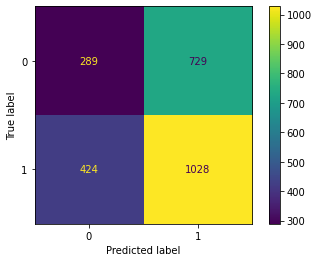

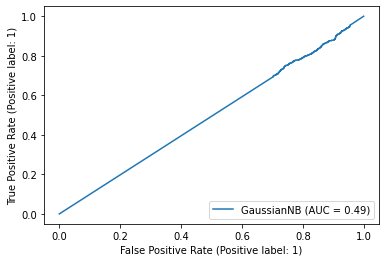

In [83]:
print('Acurácia: '+ str(accuracy_score(df_test['sentiment'], y_pred)))
print('F1 Score: ' + str(f1_score(df_test['sentiment'], y_pred)))
print('Recall Score: '+str(recall_score(df_test['sentiment'], y_pred)))
ConfusionMatrixDisplay.from_estimator(model, test_bow, df_test['sentiment'])
RocCurveDisplay.from_estimator(model, test_bow, df_test['sentiment'])

### Devido à natureza do problema, não faz tanto sentido avaliar os modelos somente por meio do Recall ou da Precisão, visto que não há grandes problemas se ocorrem falsos positivos ou falsos negativos, como é o caso de problemas como detecção de fraude ou de identificação de doenças. Assim, faz mais sentido que busquemos um bom balanço entre essas duas métricas, assim o F1 Score(Que é composto justamente por essas duas métricas). Além disso, ele também faz mais sentido pro nosso DataSet por termos classes desbalanceadas.

### A Regressão Logística e o Naive Bayes Gaussiano com o Bag of Words tiveram perfomances semelhantes no F1, por volta de 0,4. Assim, os próximos seriam realizar a tunagem dos hiperparâmetros com esses modelos para que eles obtenham uma melhor perfomance.

### É válido notar que os modelos aqui apresentados não tiveram métricas muito satisfatórias, assim, também é válido testar outros modelos de classificação(KNN, Random Decision Tree, etc.) e também revisar a etapa do pré-processamento.

# Word Embeddings

## Por último, vamos brincar um pouco com Word Embeddings, uma forma de vetorizar palavras.

## Primeiro, vamos criar nossos embeddings utilizando o Corpus das reviews, em seguindo, iremos fazer analogias e similaridades.

In [84]:
from gensim.models import Word2Vec

In [85]:
sent = df_full['reviewText'].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split()

In [86]:
model = Word2Vec(sent, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)

In [87]:
model.wv.most_similar(positive = 'microsoft')

[('sony', 0.9360807538032532),
 ('thq', 0.8986387252807617),
 ('ea', 0.8944419622421265),
 ('razer', 0.8856889605522156),
 ('blizzard', 0.8816443681716919),
 ('ubisoft', 0.8815895318984985),
 ('logitech', 0.8792825937271118),
 ('warranty', 0.8729804158210754),
 ('eas', 0.8715243339538574),
 ('bethesda', 0.8713812232017517)]

In [88]:
model.wv.most_similar(positive = 'fps')

[('shooter', 0.9024617671966553),
 ('racing', 0.8964719772338867),
 ('rpg', 0.8916692733764648),
 ('rts', 0.8901944160461426),
 ('mmo', 0.8866262435913086),
 ('jrpg', 0.8840286731719971),
 ('simulation', 0.8821945190429688),
 ('shooters', 0.8737082481384277),
 ('rally', 0.866271436214447),
 ('racer', 0.8662205934524536)]

In [89]:
model.wv.most_similar(positive = 'cod')

[('mw2', 0.9165198802947998),
 ('mw3', 0.9114754796028137),
 ('halo', 0.9064012765884399),
 ('cod4', 0.9016337990760803),
 ('battlefield', 0.8981793522834778),
 ('simcity', 0.8918343186378479),
 ('nfs', 0.8913503289222717),
 ('borderlands', 0.8892561793327332),
 ('skyrim', 0.8888810873031616),
 ('waw', 0.8868841528892517)]

In [90]:
model.wv.most_similar(negative = ['mario'], positive = ['nintendo', 'sonic'])

[('sega', 0.8601274490356445),
 ('ps2', 0.8568673133850098),
 ('monopoly', 0.8530500531196594),
 ('dreamcast', 0.8513323664665222),
 ('n64', 0.8474084734916687),
 ('snes', 0.8445892333984375),
 ('gamecube', 0.8427847027778625),
 ('genesis', 0.8391146659851074),
 ('gba', 0.8386629819869995),
 ('re4', 0.8381403684616089)]

In [91]:
model.wv.most_similar(negative = ['battlefield'], positive = ['fps', 'starcraft'])

[('racer', 0.8739457726478577),
 ('hockey', 0.8573291897773743),
 ('simulation', 0.8573035001754761),
 ('rts', 0.856051504611969),
 ('mmorpg', 0.8546346426010132),
 ('nascar', 0.851344645023346),
 ('oldschool', 0.8499554991722107),
 ('tennis', 0.8475775122642517),
 ('mmo', 0.846422553062439),
 ('actionadventure', 0.844720184803009)]

In [92]:
model.wv.doesnt_match(['mario', 'cod', 'battlefield']) 

'mario'

In [93]:
model.wv.doesnt_match(['mario', 'sonic', 'halo']) 

'halo'

### Como próximos passos, é interessante testar o modelo com diferentes dimensões.

In [94]:
## Testar com modelos de classificação não binária
## Testar sem lemmatização
## Tetar lemmatização + pos_tag
## Conferir stop_words
## WordCloud pelas classes
## PCA -> Para gerar feature de modelo